In [1]:
import torch
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pysr

/home/elg227/.conda/envs/pysr38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/elg227/.conda/envs/pysr38/lib/python3.8/site-packages/juliacall/__init__.py:60: UserWarning: torch was imported before juliacall. This may cause a segfault. To avoid this, import juliacall before importing torch. For updates, see https://github.com/pytorch/pytorch/issues/78829.
  warnings.warn(


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [4]:
# feature_nn = torch.load('21101_feature_nn.pt')

In [13]:
# the model regularized with l1 penalty (but I forgot to take an absolute value, so its actually just regularized to have very negative weights)
feature_nn = torch.load('/home/elg227/bnn_chaos_model/models/29170_feature_nn.pt')

In [2]:
import pickle

# Specify the path to your pickle file
pickle_file_path = '/home/elg227/bnn_chaos_model/sr_results/79138.pkl'

# Open the pickle file in binary read mode and load the object
with open(pickle_file_path, 'rb') as f:
    data = pickle.load(f)

results = data.equations_[0]  # equations for predicting the mean

In [3]:
labels = ['time', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno', 'a1', 'e1', 'i1', 'cos_Omega1', 'sin_Omega1', 'cos_pomega1', 'sin_pomega1', 'cos_theta1', 'sin_theta1', 'a2', 'e2', 'i2', 'cos_Omega2', 'sin_Omega2', 'cos_pomega2', 'sin_pomega2', 'cos_theta2', 'sin_theta2', 'a3', 'e3', 'i3', 'cos_Omega3', 'sin_Omega3', 'cos_pomega3', 'sin_pomega3', 'cos_theta3', 'sin_theta3', 'm1', 'm2', 'm3', 'nan_mmr_near', 'nan_mmr_far', 'nan_megno']

# not all of these labels are actually used. for training, these inputs are zeroed out, but still passed in as zeroes.
# ideally, the linear layer ignores them, which does happen if i do l1 regularization to it
skipped = ['nan_mmr_near', 'nan_mmr_far', 'nan_megno', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno']

In [14]:
# this gives the (n_features, n_inputs) matrix of the linear transformation used as f1
input_linear = feature_nn.weight.detach().numpy()
input_linear.shape

(20, 41)

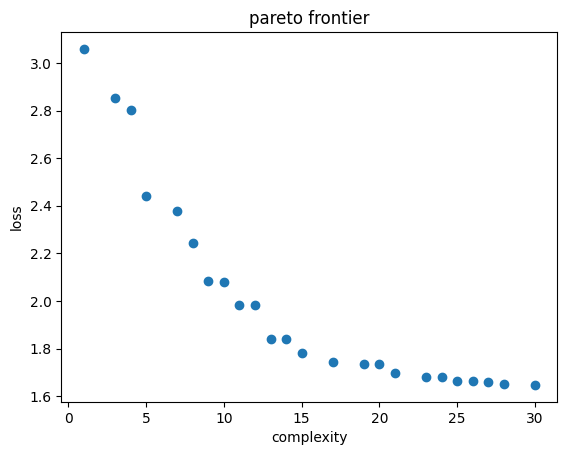

In [4]:
# plot the pareto curve for results
x = results['complexity']
y = results['loss']
# plot the pareto frontier
plt.scatter(x, y)
plt.xlabel('complexity')
plt.ylabel('loss')
plt.title('pareto frontier')
plt.show()


In [5]:
results

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,3.058837,0.000000e+00,6.787548,6.78754800000000,PySRFunction(X=>6.78754800000000)
1,3,2.852825,3.486256e-02,7.4305987 - s8,7.4305987 - s8,PySRFunction(X=>7.4305987 - s8)
2,4,2.804055,1.724315e-02,6.955366 - sin(m19),6.955366 - sin(m19),PySRFunction(X=>6.955366 - sin(m19))
3,5,2.439445,1.392960e-01,(s14 ^ -0.3514014) - -3.3290584,s14**(-0.3514014) + 3.3290584,PySRFunction(X=>s14**(-0.3514014) + 3.3290584)
4,7,2.379621,1.241466e-02,((s14 ^ -0.3209357) - -4.345556) - s8,s14**(-0.3209357) - s8 + 4.345556,PySRFunction(X=>s14**(-0.3209357) - s8 + 4.345...
5,8,2.242725,5.924959e-02,(4.3761067 + (s14 ^ -0.27230078)) - sin(m19),s14**(-0.27230078) - sin(m19) + 4.3761067,PySRFunction(X=>s14**(-0.27230078) - sin(m19) ...
6,9,2.082375,7.418277e-02,((s14 ^ -0.3514014) - -3.3290584) + (-0.351401...,-0.3514014*m1 + s14**(-0.3514014) + 3.3290584,PySRFunction(X=>-0.3514014*m1 + s14**(-0.35140...
7,10,2.079023,1.610613e-03,((s14 ^ -0.3514014) - -3.3290584) + sin(-0.351...,s14**(-0.3514014) - sin(0.3514014*m1) + 3.3290584,PySRFunction(X=>s14**(-0.3514014) - sin(0.3514...
8,11,1.984665,4.644823e-02,((s14 ^ -0.34471112) - -4.345556) - ((1.563507...,-1.5635078**m1 + s14**(-0.34471112) + 4.69026712,PySRFunction(X=>-1.5635078**m1 + s14**(-0.3447...
9,12,1.984550,5.794597e-05,((s14 ^ -0.34471112) - -4.345556) - ((1.563507...,-1.5635078**m1 + s14**(-0.34471112) + 4.683480...,PySRFunction(X=>-1.5635078**m1 + s14**(-0.3447...


In [6]:
# let's interpret the complexity 8 equation as an example
# get entry where complexity = 8
results[results['complexity'] == 8]


,complexity,loss,score,equation,sympy_format,lambda_format
5,8,2.242725,0.05925,(4.3761067 + (s14 ^ -0.27230078)) - sin(m19),s14**(-0.27230078) - sin(m19) + 4.3761067,PySRFunction(X=>s14**(-0.27230078) - sin(m19) ...


In [15]:
# m_i is the mean of the i'th feature, s_i is the standard deviation
# get the linear transformation that creates feature i
def linear_transformation(i):
    return input_linear[i]

In [16]:
linear_transformation(0)

array([ 8.40361603e-03, -5.65953611e-04, -7.09768385e-03, -2.49324902e-03,
        5.86562417e-03, -2.09137751e-03,  8.08971119e-04, -1.05324732e-02,
       -3.47493142e-02, -1.10499524e-01, -1.26364734e-02, -9.94800776e-03,
       -9.49062221e-03, -8.31117330e-04, -1.70184555e-03,  1.59787443e-02,
       -1.50173502e-02,  2.34052002e-01, -9.41666812e-02, -2.15748232e-02,
        4.95278882e-03,  5.39152650e-03, -2.03797910e-02,  3.68059124e-03,
        6.54183468e-03,  2.08251341e-03,  5.53641379e-01, -6.29596710e-02,
       -3.28904353e-02, -5.42496517e-03,  1.06737353e-02,  2.45977901e-02,
       -3.26398853e-03,  5.64512052e-03,  1.86861446e-03, -2.30452394e+00,
        4.03882228e-02,  1.05303094e-01, -1.64498505e-03, -4.08150023e-03,
       -2.26079044e-03], dtype=float32)

In [17]:
# let's make the linear transformation a bit easier to read
def format_num(x):
    if abs(x) > 0.1:
        return f'{x:.2f}'
    if abs(x) > 0.01:
        return f'{x:.3f}'
    elif abs(x) > 0.001:
        return f'{x:.4f}'
    else:
        return f'{x:.2e}'

format_vec = np.vectorize(format_num)

In [18]:
format_vec(linear_transformation(0))

array(['0.0084', '-5.66e-04', '-0.0071', '-0.0025', '0.0059', '-0.0021',
       '8.09e-04', '-0.011', '-0.035', '-0.11', '-0.013', '-0.0099',
       '-0.0095', '-8.31e-04', '-0.0017', '0.016', '-0.015', '0.23',
       '-0.094', '-0.022', '0.0050', '0.0054', '-0.020', '0.0037',
       '0.0065', '0.0021', '0.55', '-0.063', '-0.033', '-0.0054', '0.011',
       '0.025', '-0.0033', '0.0056', '0.0019', '-2.30', '0.040', '0.11',
       '-0.0016', '-0.0041', '-0.0023'], dtype='<U9')

In [19]:
# now we can write it as a combination of the input features
# we'll sort the features by their absolute value to make it a bit easier to read
def feature_equation(i):
    transformation = linear_transformation(i)
    sorted_ixs = np.argsort(np.abs(transformation))[::-1]
    return [format_num(transformation[i]) + ' * ' + labels[i] for i in sorted_ixs if transformation[i] != 0]

In [20]:
results[results['complexity'] == 8]

,complexity,loss,score,equation,sympy_format,lambda_format
5,8,2.242725,0.05925,(4.3761067 + (s14 ^ -0.27230078)) - sin(m19),s14**(-0.27230078) - sin(m19) + 4.3761067,PySRFunction(X=>s14**(-0.27230078) - sin(m19) ...


In [21]:
for i in range(input_linear.shape[0]):
    print(f'feature {i}:')
    print(' +\n'.join(feature_equation(i)[:10]))
    print('+ ... (smaller terms omitted)')
    print()

feature 0:
-2.30 * m1 +
0.55 * a3 +
0.23 * a2 +
-0.11 * e1 +
0.11 * m3 +
-0.094 * e2 +
-0.063 * e3 +
0.040 * m2 +
-0.035 * a1 +
-0.033 * i3
+ ... (smaller terms omitted)

feature 1:
-1.65 * m2 +
-0.41 * a2 +
0.21 * m1 +
-0.17 * a3 +
0.16 * e1 +
0.13 * e3 +
0.12 * i2 +
-0.075 * m3 +
0.069 * i1 +
0.068 * a1
+ ... (smaller terms omitted)

feature 2:
0.66 * i1 +
-0.52 * i3 +
-0.49 * sin_Omega3 +
0.47 * time +
0.46 * e1 +
-0.39 * e3 +
0.31 * sin_Omega2 +
0.29 * cos_Omega3 +
0.23 * i2 +
0.22 * a1
+ ... (smaller terms omitted)

feature 3:
0.81 * sin_pomega1 +
-0.68 * sin_pomega2 +
0.65 * cos_pomega2 +
-0.40 * cos_pomega1 +
0.15 * i1 +
0.14 * cos_pomega3 +
0.076 * e2 +
-0.067 * a3 +
0.062 * i2 +
0.052 * cos_Omega2
+ ... (smaller terms omitted)

feature 4:
0.56 * i2 +
-0.44 * i3 +
-0.34 * sin_Omega2 +
-0.33 * i1 +
0.32 * sin_pomega3 +
0.21 * sin_Omega1 +
0.17 * cos_Omega3 +
0.16 * cos_pomega3 +
0.15 * cos_pomega2 +
0.13 * m2
+ ... (smaller terms omitted)

feature 5:
-2.00 * m3 +
0.85 * a3 +
-0.

In [ ]:
print(feature_equation(4))

['-0.56 * sin_pomega2', '0.50 * sin_pomega1', '0.17 * cos_pomega2', '0.16 * i1', '-0.067 * e2', '-0.066 * sin_Omega3', '0.053 * sin_pomega3', '-0.053 * i3', '0.052 * i2', '0.038 * cos_pomega3', '0.027 * cos_Omega3', '0.022 * cos_theta1', '0.019 * time', '-0.0081 * cos_theta3', '0.0073 * sin_Omega2', '-0.0070 * sin_theta3', '-0.0062 * cos_Omega1', '-0.0053 * cos_pomega1', '-0.0048 * sin_theta2', '-0.0023 * e3', '-0.0018 * cos_Omega2', '0.0018 * m2', '0.0013 * a2', '0.0013 * a3', '-0.0011 * sin_Omega1', '8.68e-04 * sin_theta1', '6.59e-04 * cos_theta2', '6.38e-04 * m1', '-5.91e-04 * e1', '4.29e-04 * nan_mmr_far', '-3.17e-04 * e+_far', '-1.80e-04 * e-_far', '-1.47e-04 * megno', '-1.23e-04 * a1', '-1.18e-04 * max_strength_mmr_near', '-9.97e-05 * max_strength_mmr_far', '-4.68e-05 * e-_near', '4.05e-05 * m3', '2.83e-05 * nan_megno', '-2.75e-05 * e+_near', '1.74e-05 * nan_mmr_near']


In [ ]:
def feature_equation2(i):
    transformation = linear_transformation(i)
    sorted_ixs = np.argsort(np.abs(transformation))[::-1]
    return ', '.join([format_num(transformation[i]) for i in sorted_ixs if transformation[i] != 0])
